<a href="https://colab.research.google.com/github/Madathanapalleleena/ML_LAB_152/blob/main/ML_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# a.Load the data into memory. Make an appropriate X matrix and y vector.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
#b.Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will be used for training + validation, and a testing set Xtest, ytest
df=pd.read_csv('diabetes.csv')
print(df.head(2))
X=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) #stratify makes sure the class distribution (diabetes vs no diabetes) is balanced between train and test.
print(x_train.shape)
print(x_test.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
(614, 8)
(154, 8)


# c.Give the objective of logistic regression with L2 regularization.
In logistic regression, we want to find parameters weights (w) and bias (b) that minimize the log-loss. A high lambda value indicates stronger regularization.
In Ridge regularization (L2), it shrinks the weights or features (coefficients) toward zero but not to be exactly zero.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
"""first we standardize the features because different features have different scale of values... to avoid that we standardize the features to avoid errors
while calculating L2"""
#we rescale the features of the dataset when we use StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
'''(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.'''

In [6]:
lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses = []
test_losses = []
train_accs = []
test_accs = []
weights = []
norms = []
for lam in lambdas: #lambda controls the strength of penality
    if lam == 0:
        #No regularization (use very large C=1/lambda)
        model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=5000) #solver-default sklearn optimization algo
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=5000) #it adds penality term which discourages large weights and helps prevent overfitting
    model.fit(x_train,y_train) #training the model on given data

    y_train_pred_prob = model.predict_proba(x_train) #finds the probabily of how well the model predicted the correct output according to the true value
    y_test_pred_prob = model.predict_proba(x_test)

    #calculation of log loss- avg penality
    train_losses.append(log_loss(y_train, y_train_pred_prob)) #measuring the loss or errors based on the
    test_losses.append(log_loss(y_test, y_test_pred_prob))
    print("Log loss")
    print(train_losses)
    print(test_losses)

    #Accuracy
    train_accs.append(accuracy_score(y_train, model.predict(x_train)))  #we send parameters - actual label, the model predicted value/label
    test_accs.append(accuracy_score(y_test, model.predict(x_test)))  #accuracy=correct predictions/total predictions
    print("accuracy")
    print(train_accs)
    print(test_accs)

    coef = model.coef_[0]
    weights.append(coef)
    norms.append(np.linalg.norm(coef))  #measure overall magnitude of weight
    print(weights)
    print(norms)  #less norm model is regularized,less extreme weights
weights = np.array(weights)

Log loss
[0.4662068722133981]
[0.49493919594095664]
accuracy
[0.7947882736156352]
[0.7142857142857143]
[array([ 0.38069548,  1.16644131, -0.20472194,  0.0696351 , -0.1371041 ,
        0.72747363,  0.25934003,  0.18192122])]
[np.float64(1.4834562604942947)]
Log loss
[0.4662068722133981, 0.46620713229698807]
[0.49493919594095664, 0.49488764729230633]
accuracy
[0.7947882736156352, 0.7947882736156352]
[0.7142857142857143, 0.7142857142857143]
[array([ 0.38069548,  1.16644131, -0.20472194,  0.0696351 , -0.1371041 ,
        0.72747363,  0.25934003,  0.18192122]), array([ 0.379917  ,  1.16414219, -0.20399114,  0.06930777, -0.13608552,
        0.72607641,  0.25894733,  0.18216073])]
[np.float64(1.4834562604942947), np.float64(1.4805142275088101)]
Log loss
[0.4662068722133981, 0.46620713229698807, 0.4662395748305727]
[0.49493919594095664, 0.49488764729230633, 0.49447687444769367]
accuracy
[0.7947882736156352, 0.7947882736156352, 0.7915309446254072]
[0.7142857142857143, 0.7142857142857143, 0.7142

In [ ]:
train_losses=[]
test_losses=[]
train_losses.append(log_loss(y_train, y_train_pred_prob)) #measuring the loss or errors based on the
test_losses.append(log_loss(y_test, y_test_pred_prob))
print(train_losses)
print(test_losses)

[0.5970904231125922]
[0.60319311541785]


From above we can say that model is better than random guessing

According to values -- about model

= 0.0 = perfect predictions (probability 1.0 for correct class).

≈ 0.1 – 0.3 → excellent model.

≈ 0.5 – 0.7 → moderate model.

≈ 0.69+ → like random guessing (for binary classification).

more than 1.0 → very poor, model is confidently wrong often.

In [ ]:
train_accs=[]
test_accs=[]
train_accs.append(accuracy_score(y_train, model.predict(x_train)))  #we send parameters - actual label, the model predicted value/label
test_accs.append(accuracy_score(y_test, model.predict(x_test)))  #accuracy=correct predictions/total predictions
print(train_accs)
print(test_accs)  #higher accuracy mean the model is predicting mostly correct

[0.6498371335504886]
[0.6558441558441559]


In [ ]:
weights=[]
norms=[]
coef = model.coef_[0]
weights.append(coef)
norms.append(np.linalg.norm(coef))  #measure overall magnitude of weight
print(weights)
print(norms)  #less norm model is regularized,less extreme weights

[array([0.04850216, 0.11620001, 0.01395046, 0.01840164, 0.03344241,
       0.07181511, 0.03787714, 0.05428606])]
[np.float64(0.16445545348780105)]


In [ ]:
weights = np.array(weights)
print(weights)

[[0.04850216 0.11620001 0.01395046 0.01840164 0.03344241 0.07181511
  0.03787714 0.05428606]]


**Complete Process done here**

Train model for a given λ.

Get predicted probabilities.

Compute log loss (error based on probability quality).

Compute accuracy (simple correctness measure).

Record weights + their norm (to see regularization effect).

Repeat for all λ values.

Finally, plot all results to visualize the trade-offs.

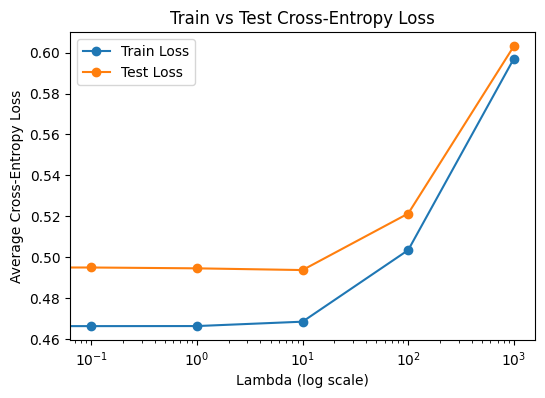

In [ ]:
#Cross entropy
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Average Cross-Entropy Loss")
plt.title("Train vs Test Cross-Entropy Loss")
plt.legend()
plt.show()

**Cross-Entropy Loss**

With λ=0 (no reg.), model may overfit → low train loss, higher test loss.

With moderate λ, train and test losses balance.

With very high λ, model underfits (both losses rise).

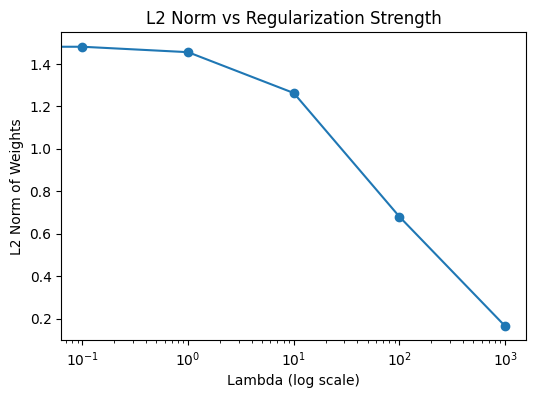

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, norms, marker='o')
plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("L2 Norm of Weights") #length or size of feature
plt.title("L2 Norm vs Regularization Strength")
plt.show()

**L2 Norm of Weights**

As λ increases → weights shrink towards 0.

This shows how regularization prevents overfitting.

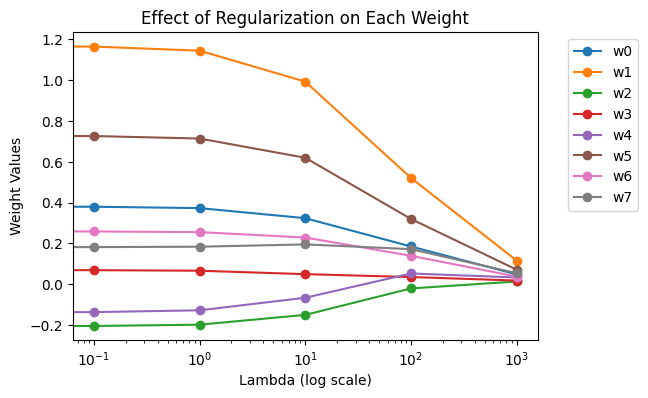

In [ ]:
plt.figure(figsize=(6,4))   #as lambda increase , overfitting reduces
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:,i], marker='o', label=f"w{i}")
plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Weight Values")
plt.title("Effect of Regularization on Each Weight")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

**Weight Values**

Without reg., weights are larger.

Increasing λ pulls weights toward 0, reducing complexity.

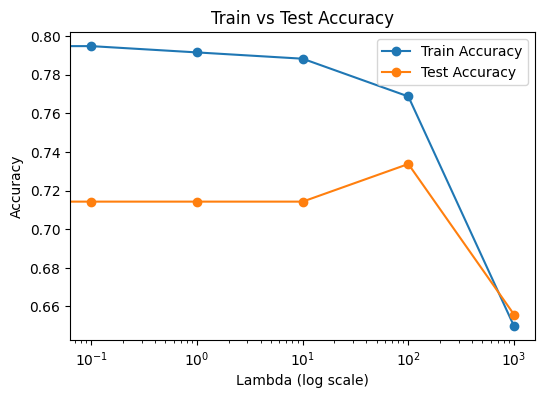

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.show()

**Accuracy**

Overfitting at λ=0 → high train acc, lower test acc.

Moderate λ (0.1–10) usually best test accuracy.

Too large λ (1000) → underfitting → accuracy drops.

In [ ]:
"""e) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off."""

'Using no regularization and doing regression with this new set of basis functions, plot the\ntraining and testing error as a function of σ (when using only basis functions of a given σ). Add\nconstant lines showing the training and testing error you had obtained in part c. Explain how σ\ninfluences overfitting and the bias-variance trade-off.'

In [1]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


**Guassian Basis Function**

Gaussian basis functions allow us to map features into a higher-dimensional, nonlinear space.

This way, logistic regression can learn nonlinear decision boundaries.

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
def gbt(X,sigma,n_basis=5,low=-10,high=10):
  samples,features=X.shape
  means=np.linspace(low,high,n_basis)
  print("Equally splitted means:",means)
  x_new=[] #new features after performing gaussian basis function
  for i in range(features):
    for m in means:
      x_new.append(np.exp(-(X[:,i]-m)**2/(2*sigma**2)))  #gaussian basis function
  x_new=np.array(x_new).T
  print(x_new)
  return x_new

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=pd.read_csv('diabetes.csv')
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values
X_std = scaler.fit_transform(X)   #first we need to standardize the data to scale the features
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42,stratify=y)
X_train_basic1=gbt(x_train,sigma=0.1)
print("\n")
X_test_basic2=gbt(x_test,sigma=0.5)
print("\n")
X_test_basis3=gbt(x_test,sigma=1)
print("\n")
X_test_basis4=gbt(x_test,sigma=5)
print("\n")
X_test_basis5=gbt(x_test,sigma=10)

Equally splitted means: [-10.  -5.   0.   5.  10.]
[[0.00000000e+00 0.00000000e+00 3.15763652e-16 ... 3.75802551e-14
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.78978326e-03 ... 6.57091011e-08
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.02634781e-07 ... 2.10533487e-11
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 3.15763652e-16 ... 2.23222920e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.83962881e-73 ... 6.57091011e-08
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.99545224e-01 ... 6.00388395e-03
  0.00000000e+00 0.00000000e+00]]


Equally splitted means: [-10.  -5.   0.   5.  10.]
[[1.26704334e-104 2.42601205e-031 1.72800998e-001 ... 5.16065731e-001
  9.84898101e-018 6.99245032e-078]
 [3.06809045e-122 3.21531411e-041 1.25351768e-003 ... 6.44911347e-002
  1.83495801e-013 1.94224518e-068]
 [2.50415491e-078 6.07677376e-018 5.48575937e-001 ... 4.68047863e-001
  4.01880450e-02

According to sigma values how the gaussian basis function responds

Small σ = overfitting.

Medium σ = balanced.

Huge σ = underfitting.

In [4]:
'''(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.'''

'(f) Using no regularization and doing regression with this new set of basis functions, plot the\ntraining and testing error as a function of σ (when using only basis functions of a given σ). Add\nconstant lines showing the training and testing error you had obtained in part c. Explain how σ\ninfluences overfitting and the bias-variance trade-off.'

In [8]:
sigmas = [0.1, 0.5, 1, 5, 10]
train_losses_sigma = []
test_losses_sigma = []

for sigma in sigmas:
    X_train_phi=gbt(x_train, sigma)
    X_test_phi=gbt(x_test, sigma)

    model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=5000) #Logistic regression with NO regularization
    model.fit(X_train_phi, y_train)

    y_train_pred= model.predict_proba(X_train_phi) #predicting probablilties
    y_test_pred= model.predict_proba(X_test_phi)

    #Calculation of Log losses
    train_losses_sigma.append(log_loss(y_train, y_train_pred))
    test_losses_sigma.append(log_loss(y_test, y_test_pred))

Equally splitted means: [-10.  -5.   0.   5.  10.]
[[0.00000000e+00 0.00000000e+00 1.82410307e-16 ... 2.36217457e-14
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.73402625e-03 ... 1.46250156e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.79433506e-07 ... 1.34173862e-11
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.82410307e-16 ... 1.73663579e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.24207711e-76 ... 1.46250156e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.61552261e-01 ... 8.89809894e-03
  0.00000000e+00 0.00000000e+00]]
Equally splitted means: [-10.  -5.   0.   5.  10.]
[[0.00000000e+000 0.00000000e+000 9.22887328e-021 ... 1.46250156e-007
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 2.24207711e-076 ... 1.34659508e-029
  4.39718425e-322 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 2.79433506e-007 ... 3.72713045e-009
  0.00000000e+000 

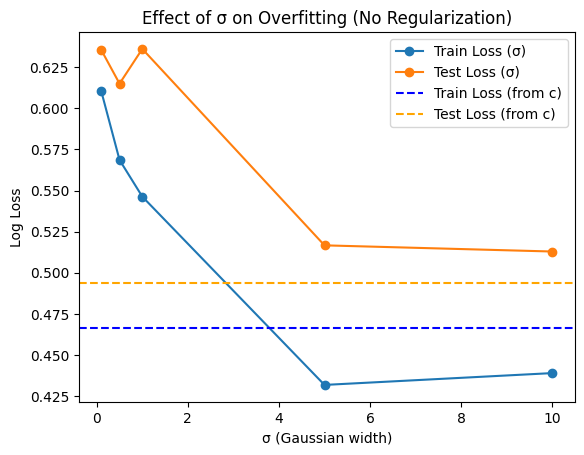

In [9]:
#graph for the above
import matplotlib.pyplot as plt

plt.plot(sigmas, train_losses_sigma, marker="o", label="Train Loss (σ)")
plt.plot(sigmas, test_losses_sigma, marker="o", label="Test Loss (σ)")

# Add constant reference lines from part (c)
plt.axhline(y=min(train_losses), color="blue", linestyle="--", label="Train Loss (from c)")
plt.axhline(y=min(test_losses), color="orange", linestyle="--", label="Test Loss (from c)")

plt.xlabel("σ (Gaussian width)")
plt.ylabel("Log Loss")
plt.title("Effect of σ on Overfitting (No Regularization)")
plt.legend()
plt.show()

**Polynomial basis (part c):**

Errors are high → model too simple → underfits (high bias).

**Gaussian basis (part f):**

Small σ: Very low training error but high test error → overfits (high variance).

Medium σ: Both errors low → best balance (good bias–variance trade-off).

Large σ: Errors high again → model too smooth → underfits (high bias).